In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
filename = 'data_weather/synop-2016.csv'
df = pd.read_csv(filename, sep=",", encoding="utf-8", header=0)


## Total rainfall

In [ ]:
sum_rainfall_year = df['Rainfall 3 last hours'].sum()
print('Sum of rainfall during year in mm', sum_rainfall_year)

##  Average temperature during year

In [ ]:
kelvin_to_celsius = -273.15
average_temperature_year = (df['Temperature'] + kelvin_to_celsius).mean()
std_temperature_year = (df['Temperature'] + kelvin_to_celsius).std()
print('Average and variance temperature during year:', average_temperature_year, std_temperature_year)

## Rainfall during June

In [ ]:
# first the manual way, we create a new entry in the dataframe
df['month'] = df['Date'].str[5:7]
total_rainfall_june = df[df['month'] == '06']['Rainfall 3 last hours'].sum()
print('Sum of rainfall during June in mm', total_rainfall_june)


In [ ]:
# Total rainfall during June
# More elegant solution by converting the Date format, allows for easier manipulation
df['Date'] = pd.to_datetime(df['Date'], utc=True)

total_rainfall_june = df[df['Date'].dt.month == 6]['Rainfall 3 last hours'].sum()
print('Sum of rainfall during June in mm', total_rainfall_june)


## average temperature when it is raining

In [ ]:
average_temperature_rain = df[df['Rainfall 3 last hours'] > 0]['Temperature'].mean()
print('Average temperature during rain', average_temperature_rain + kelvin_to_celsius)

## plot temperature as a function of time
There are many ways to do it, I will present a very dense solution. 

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by week and compute the average, minimum, and maximum temperature for each week
weekly_stats = df.resample('W', on='Date').agg({'Temperature': ['mean', 'min', 'max']})
# The above line groups the data by week using the frequency 'W' 

# Plot the average temperature over the weeks along with the minimum and maximum temperature for each week
plt.figure(figsize=(10, 6))
plt.plot(weekly_stats.index, weekly_stats['Temperature']['mean'], marker='o', linestyle='-', label='Average Temperature')
plt.fill_between(
    weekly_stats.index,
    weekly_stats['Temperature']['min'],
    weekly_stats['Temperature']['max'],
    color='gray',
    alpha=0.3,
    label='Temperature Range'
)
plt.xlabel('Week')
plt.ylabel('Temperature')
plt.title('Average Temperature over a Week with Min and Max')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Average_temp_ajaccio.pdf')
plt.show()

## Exercise 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename_74 = 'data_weather/MENSQ_74_previous-1950-2022.csv'
dataframe_74 = pd.read_csv(filename_74, sep=";", encoding="utf-8", header=0, na_values='')

# get dates to better format, easier to work with it afterwards
dataframe_74['dates'] = pd.to_datetime(dataframe_74['AAAAMM'], format='%Y%m')

In [5]:
chamonix_dataframe = dataframe_74[dataframe_74['NOM_USUEL'] == 'CHAMONIX']
dates_at_loc = chamonix_dataframe['dates']
quantity_at_loc = chamonix_dataframe['TM']


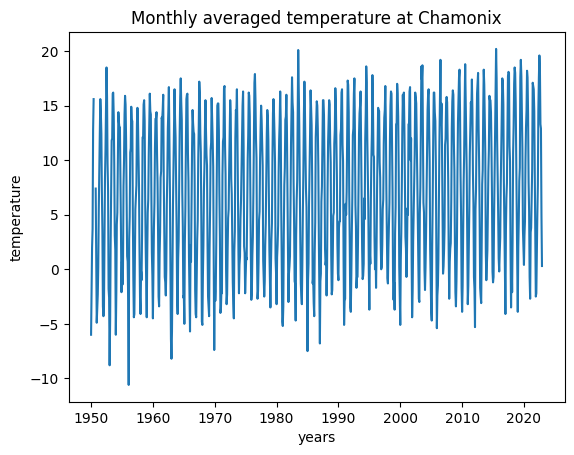

In [3]:
# We want to plot the quantity TM at the location chamonix:
quantity = 'TM'
location = 'CHAMONIX'

chamonix_dataframe = dataframe_74[dataframe_74['NOM_USUEL'] == location]
dates_at_loc = chamonix_dataframe['dates']
quantity_at_loc = chamonix_dataframe[quantity]

plt.title(f'Monthly averaged temperature at {location.lower().capitalize()}')
plt.plot(dates_at_loc, quantity_at_loc)
plt.xlabel('years')
plt.ylabel('temperature')
plt.savefig('Monthly_temperature_chamonix.pdf')

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Remove missing data (NaN values)
df_chamonix_clean = chamonix_dataframe.dropna(subset=['TM'])

# get numerical time
months = chamonix_dataframe['dates'].dt.month
years = chamonix_dataframe['dates'].dt.year
df_chamonix_clean['time'] = years + months / 12

# Reshape the data for the linear regression model
X = df_chamonix_clean['time'].values.reshape(-1, 1)
y = df_chamonix_clean['TM'].values.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print our (grim) predictions based on slope
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print("Slope: in Celsius / year", model.coef_[0][0])
print('Increase in temperature 1950 - 2050', model.coef_[0][0] * 100)

# predict the temperature in 2050:
print('Temperature in 2050', model.predict(np.array(2050).reshape(1, -1)))

In [ ]:
plt.plot(df_chamonix_clean['time'], df_chamonix_clean['TM'], label='Monthly temperature')

# plot the linear fit in the period 1950-2050
prediction_times = np.linspace(0, 2050, 3) # three points are more than enough
prediction_temps = prediction_times * slope + intercept
plt.plot(prediction_times, prediction_temps, label='Temperature trend')
plt.xlim((1950, 2050))
plt.ylim((-10, 20))

plt.xlabel('years')
plt.ylabel('temperature')
plt.legend()

plt.tight_layout()
plt.savefig(f'Temperature_trend_{location}.pdf')


## Bonus: moving average

In [ ]:
# We need to choose a window, a multiple a 12 will smoothen the variations
w = 48

# Calculate the moving average of 'time' and 'TM' columns with a window size of 3
df_chamonix_clean['time_ma'] = df_chamonix_clean['time'].rolling(window=w).mean()
df_chamonix_clean['TM_ma'] = df_chamonix_clean['TM'].rolling(window=w).mean()

plt.plot(
    df_chamonix_clean['time'],
    df_chamonix_clean['TM'],
    label='Monthly temperature',
    lw=1
)
plt.plot(
    prediction_times,
    prediction_temps,
    label='Temperature trend',
    lw=3
)
plt.plot(
    df_chamonix_clean['time_ma'],
    df_chamonix_clean['TM_ma'],
    label='moving average',
    lw=3
)


plt.xlim((1950, 2020))
plt.ylim((-10, 20))
plt.legend()

plt.xlabel('years')
plt.ylabel('temperature')

plt.savefig('moving_average_vs_linear_fit.pdf')